In [1]:
import pandas as pd 
import numpy as np


In [2]:
data = np.loadtxt(open("Lab4Data.csv", "rb"), delimiter=";", skiprows=1)

In [3]:
x=data[:,:-1]

In [4]:
y=data[:,-1]

In [5]:
x[0]

array([5.2966e-02, 1.0000e+00, 3.6308e+01, 2.4189e-01, 8.3546e+01,
       5.5275e+00, 1.3939e+03, 3.3878e+01, 3.2026e+01])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### classification algorithms

   ### Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred=classifier.predict(x_test)

In [11]:
#making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("*************************")
print("accuracy of logistic regression is:",accuracy_score(y_test,y_pred))

[[137   3   0]
 [ 10  97   8]
 [  0   5 140]]
*************************
accuracy of logistic regression is: 0.935


In [12]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       140
         2.0       0.92      0.84      0.88       115
         3.0       0.95      0.97      0.96       145

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



In [13]:
from sklearn.metrics import accuracy_score
print("LogisticRegression accuracy:",accuracy_score(y_test,y_pred))

LogisticRegression accuracy: 0.935


### svm classifier

In [14]:
from sklearn.svm import SVC

In [15]:
svc=SVC()
svc.fit(x_train,y_train)

E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred_svc=svc.predict(x_test)

In [19]:
cm_svc=confusion_matrix(y_test,y_pred_svc)
print(cm_svc)
print("****************************************")
print("accuracy score og svm :",accuracy_score(y_pred_svc,y_test)*100)

[[120  20   0]
 [ 40  66   9]
 [ 28  10 107]]
****************************************
accuracy score og svm : 73.25


In [22]:
cr_svc=classification_report(y_test,y_pred_svc)

In [23]:
print(cr_svc)

              precision    recall  f1-score   support

         1.0       0.64      0.86      0.73       140
         2.0       0.69      0.57      0.63       115
         3.0       0.92      0.74      0.82       145

    accuracy                           0.73       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.76      0.73      0.73       400



In [24]:
print("Svc accuracy:",accuracy_score(y_test,y_pred_svc))

Svc accuracy: 0.7325


### Gaussian navie bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred_gn=gn.predict(x_test)

In [28]:
print("GaussianNB accuracy:",accuracy_score(y_test,y_pred_gn))

GaussianNB accuracy: 0.9525


In [29]:
cm_gn=confusion_matrix(y_test,y_pred_gn)
print(cm)
print("*******************************")
print("accuracy score of Gaussian naive_bayes :",accuracy_score(y_pred_gn,y_test)*100)

[[137   3   0]
 [ 10  97   8]
 [  0   5 140]]
*******************************
accuracy score of Gaussian naive_bayes : 95.25


### K neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [26]:
scores={}
score_list=[]
k_range=range(1,30)

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred_knn)
    score_list.append(metrics.accuracy_score(y_test,y_pred_knn))

Text(0, 0.5, 'testing accuracy')

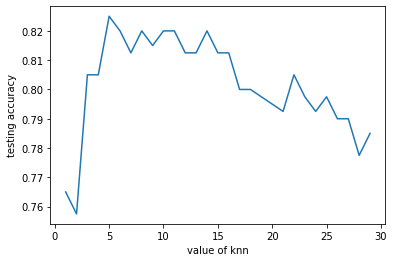

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.xlabel("value of knn")
plt.ylabel("testing accuracy")

In [28]:
knn2=KNeighborsClassifier(n_neighbors=8)
knn2.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [29]:
y_pred_knn1=knn2.predict(x_test)


In [30]:
print(accuracy_score(y_test,y_pred_knn1))

0.82


In [34]:
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [36]:
models=[]
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('KNN',KNeighborsClassifier()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

NB: 0.948125(0.021479)
SVM: 0.754375(0.037296)
KNN: 0.805625(0.031555)
